Exercise 2

Conduct an exploratory analysis of the sizes of reviews: find the shortest and longest reviews, then plot a histogram showing the distribution of review lengths.

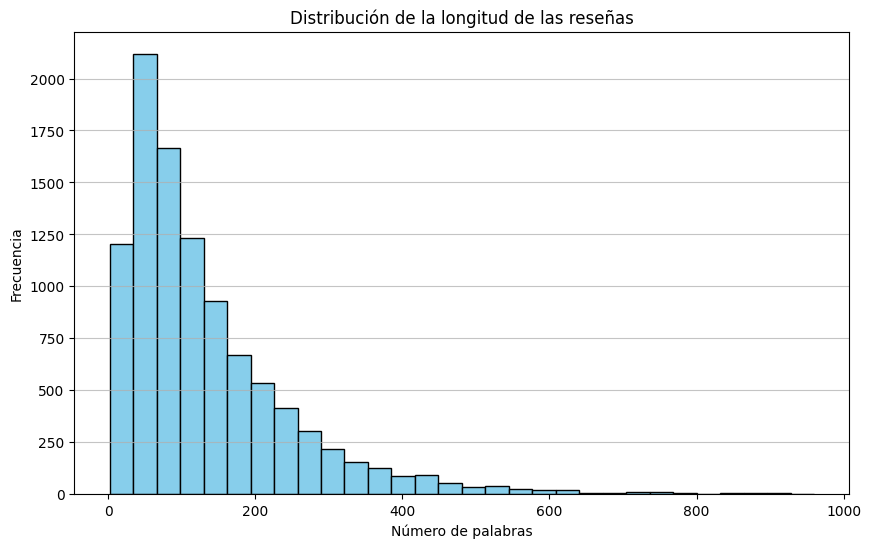

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el archivo CSV y extraer la columna 'text'
data = pd.read_csv('sdata.csv')
reviews = data['text']

# Calcular la longitud de cada reseña en palabras
review_lengths = reviews.apply(lambda x: len(x.split()))

# Identificar la reseña más corta y la más larga
longest_review = reviews[review_lengths.idxmax()]
shortest_review = reviews[review_lengths.idxmin()]

# Visualizar la distribución de la longitud de las reseñas por medio de una grafica de barras
plt.figure(figsize=(10, 6))
plt.hist(review_lengths, bins=30, edgecolor='black', color='skyblue')
plt.title('Distribución de la longitud de las reseñas')
plt.xlabel('Número de palabras')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)

# Mostrar la gráfica de barras
plt.show()

Exercise 3

Write a function word_cloud_rating(data, star_value) that constructs a word cloud from the subset of data that exhibit a certain star_value. Visualize the results of
this function for 1-star reviews.

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ORLANDO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


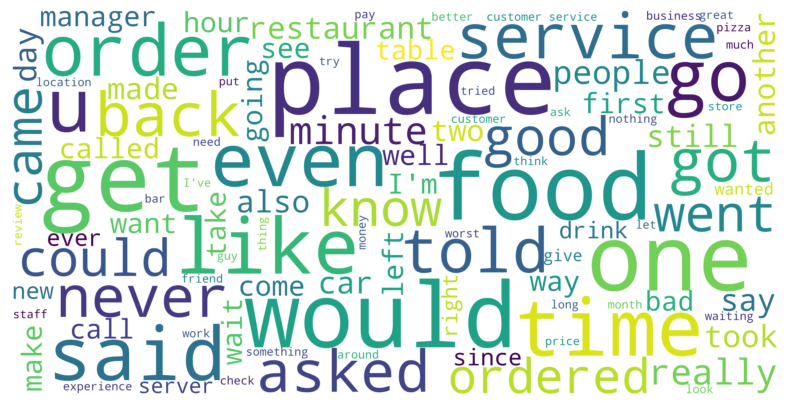

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

# Función que genera una nube de palabras basada en el número de estrellas de las reseñas
def generate_word_cloud(data, star_rating):
    # Filtrar las reseñas según el número de estrellas
    filtered_reviews = data[data['stars'] == star_rating]
    
    # Unir todas las reseñas en un solo texto
    reviews_text = ' '.join(filtered_reviews['text'].astype(str))

    # Definir las stopwords en inglés
    english_stopwords = set(stopwords.words('english'))
    
    # Generar la nube de palabras
    word_cloud = WordCloud(stopwords=english_stopwords, max_font_size=100, max_words=100, background_color="white", scale=10, width=800, height=400).generate(reviews_text)
    
    # Mostrar la nube de palabras en pantalla
    plt.figure(figsize=(10, 5))
    plt.imshow(word_cloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Cargar el archivo CSV que contiene las reseñas
data = pd.read_csv('sdata.csv')

# Llamar a la función para generar la nube de palabras de las reseñas de 1 estrella
generate_word_cloud(data, 1)